# Week:2

date:20-06-23

**#Exploring Datasets with pandas and Matplotlib**


**#Downloading and Prepping Data**

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# print the dimensions of the dataframe

print(df_can.shape)

(195, 43)


**1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).**

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


**2. Rename some of the columns so that they make sense.**

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


**3. For consistency, ensure that all column labels of type string.**

In [7]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

In [8]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

**4. Set the country name as index - useful for quickly looking up countries using .loc method.**


In [9]:
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


5. Add total column.


In [10]:
df_can['Total'] = df_can.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

<ipython-input-10-f6784906de13>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
print ('data demensions:', df_can.shape)

data demensions: (195, 38)


In [12]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#Visualizing Data using Matplotlib


Import Matplotlib and **Numpy**.

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 3.7.1

Matplotlib version:  3.7.1


#Area Plots

In [15]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


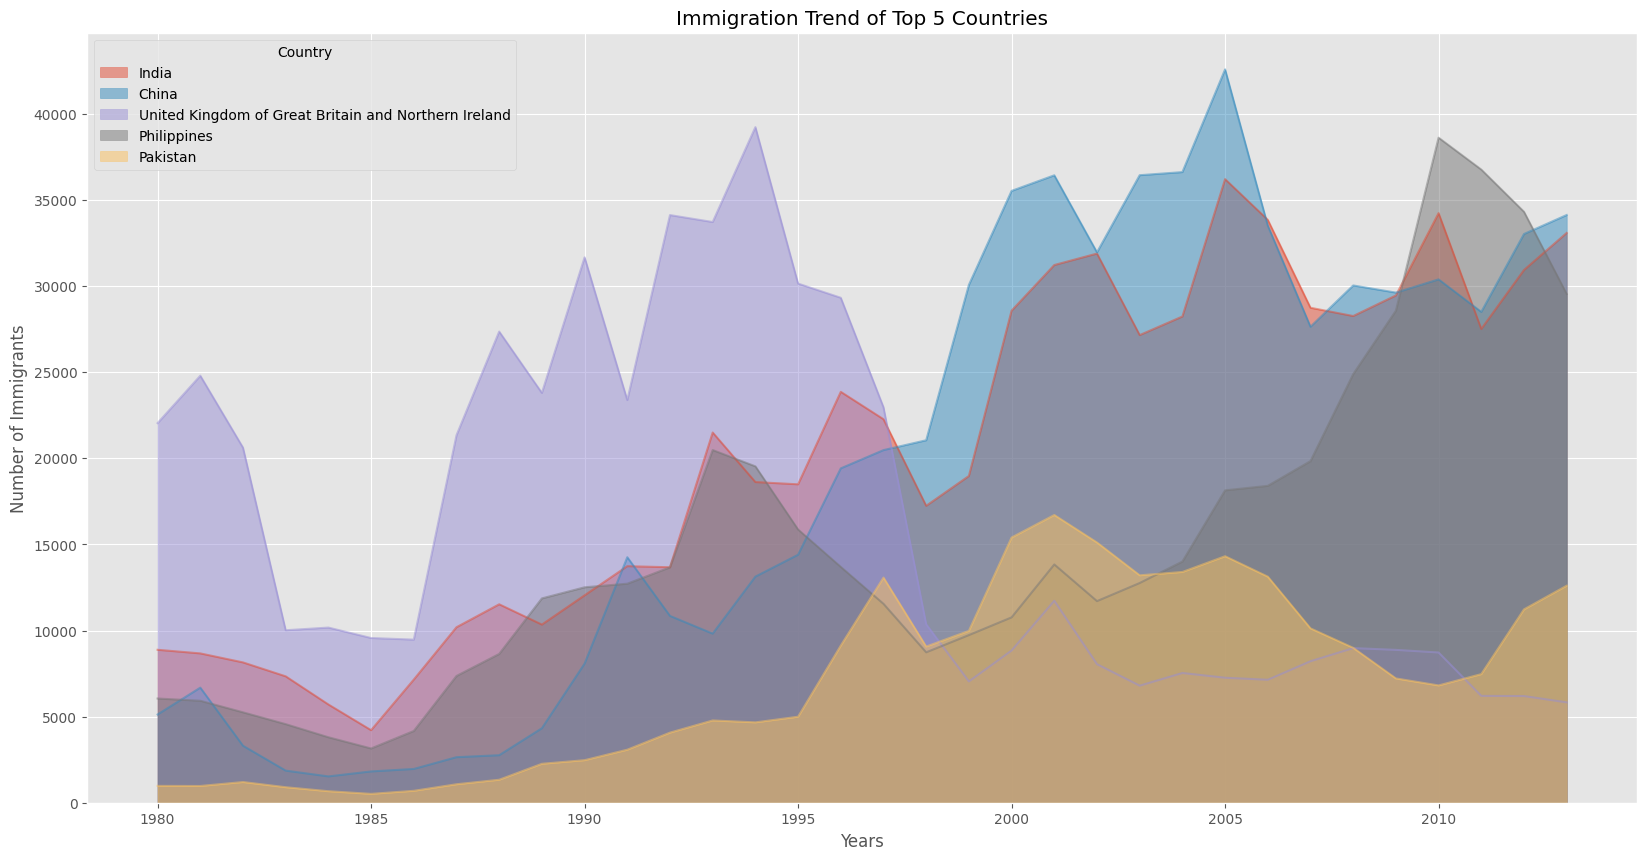

In [16]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

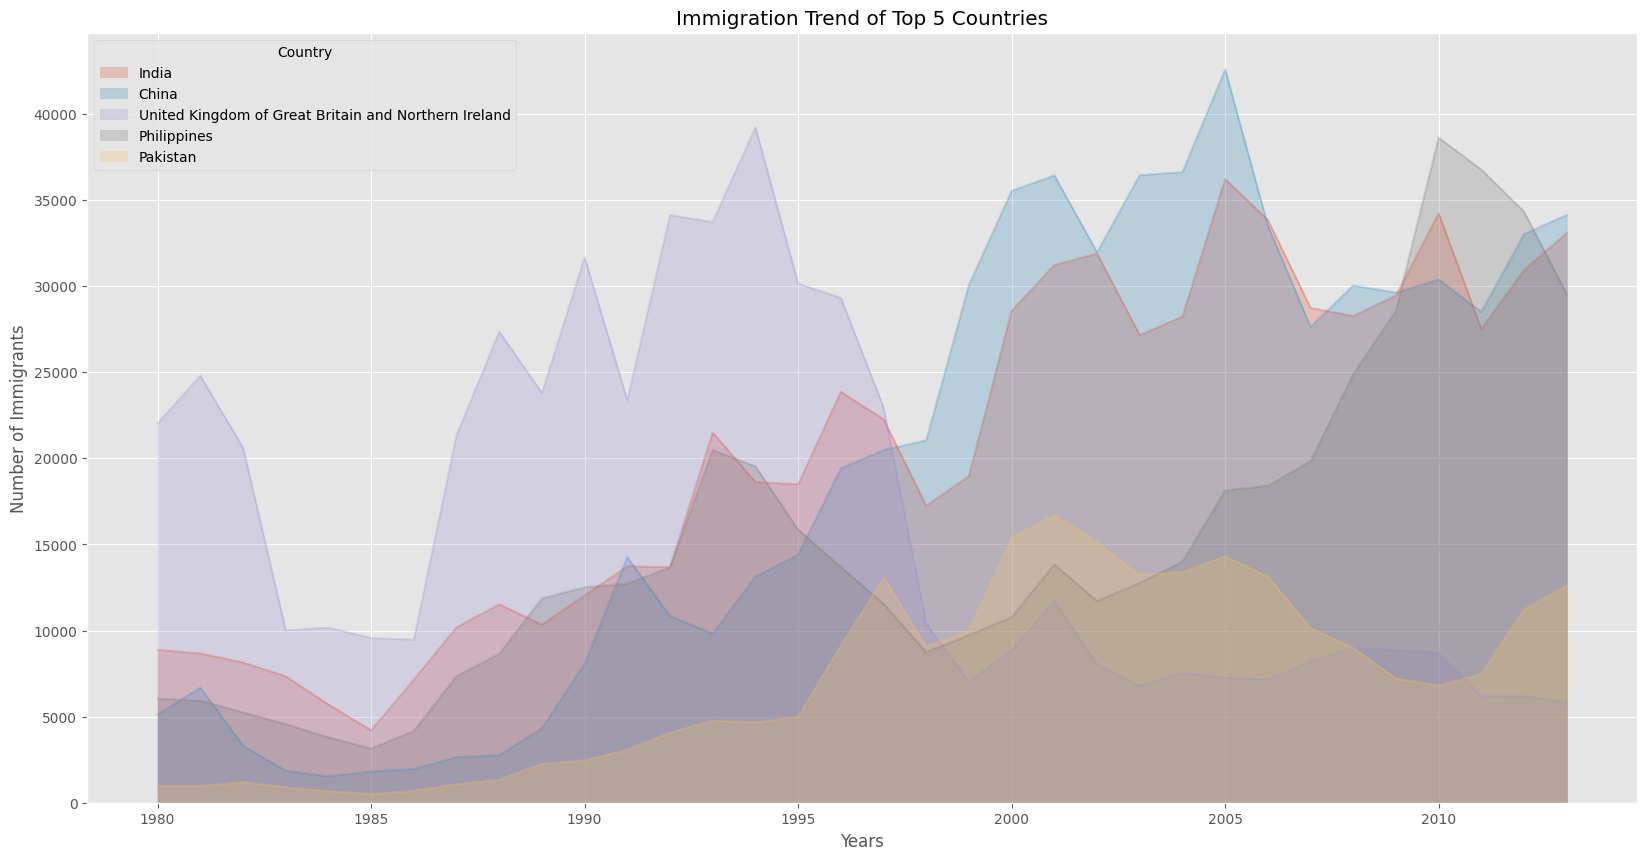

In [17]:
df_top5.plot(kind='area',
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

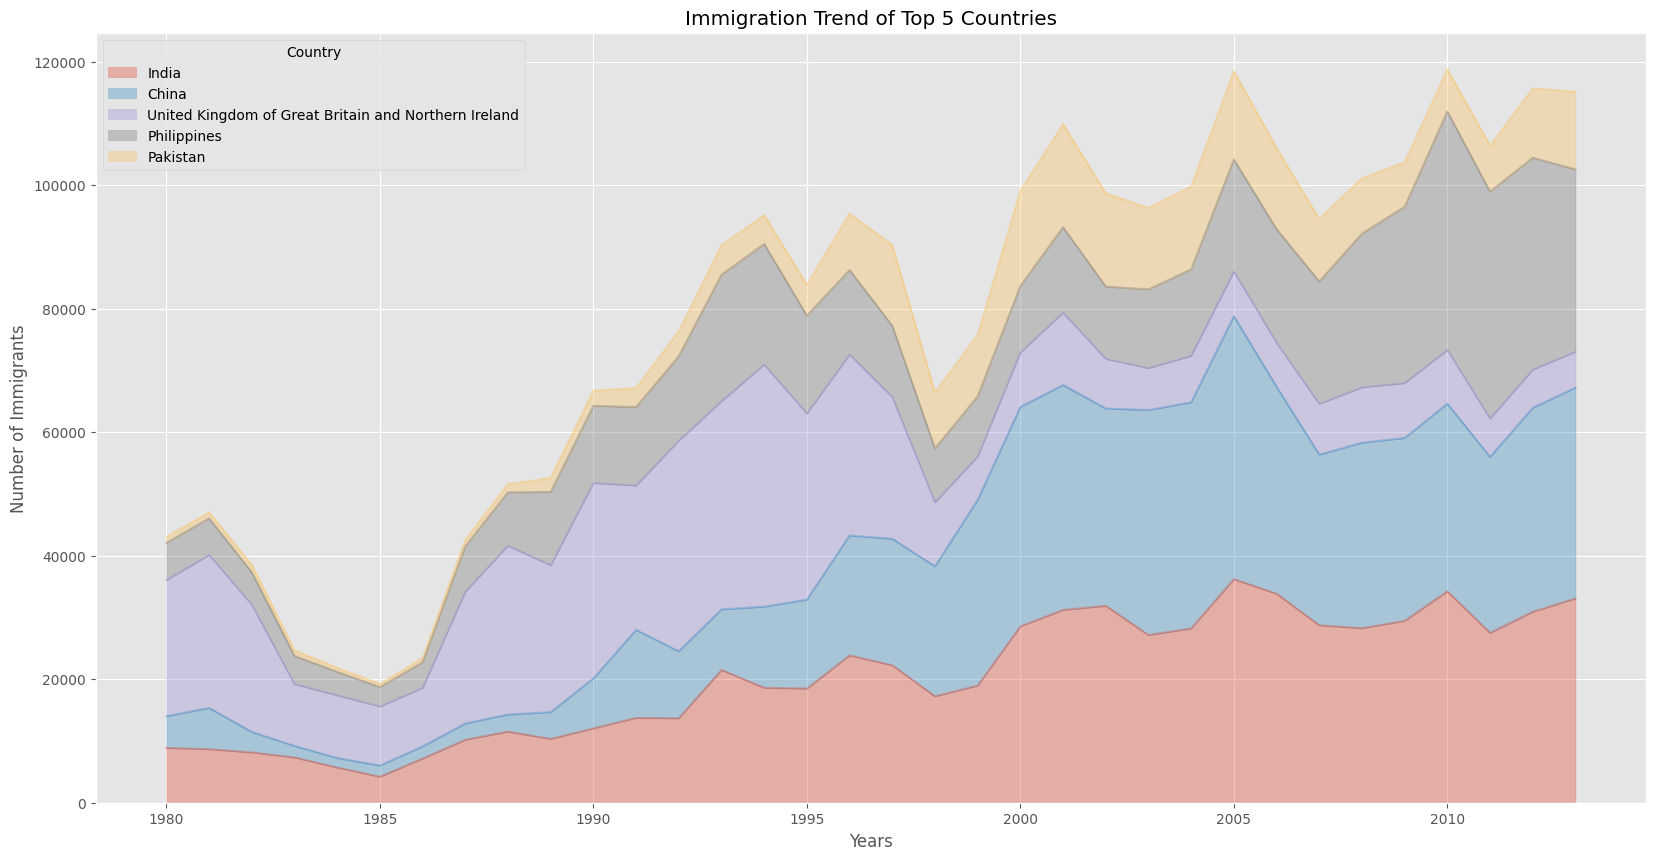

In [19]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

stion: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

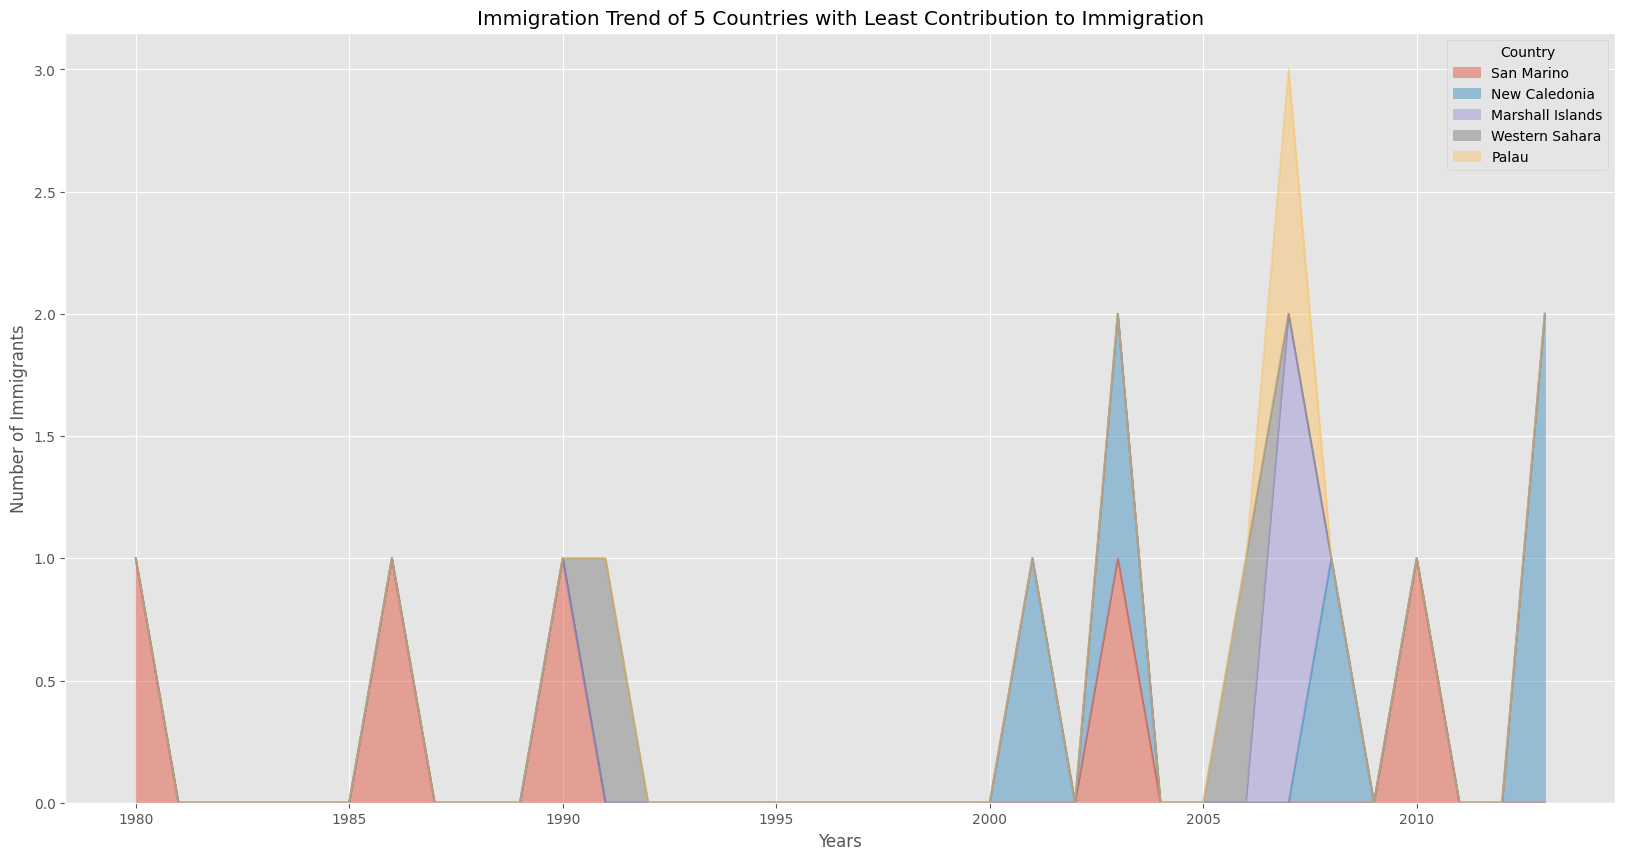

In [20]:
### type your answer here
df_last5=df_can.tail(5)
df_last5=df_last5[years].transpose()
df_last5.index=df_last5.index.map(int)

df_last5.plot(kind='area', alpha=0.45, figsize=(20,10))
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0, 0.5, 'Immigration Count')

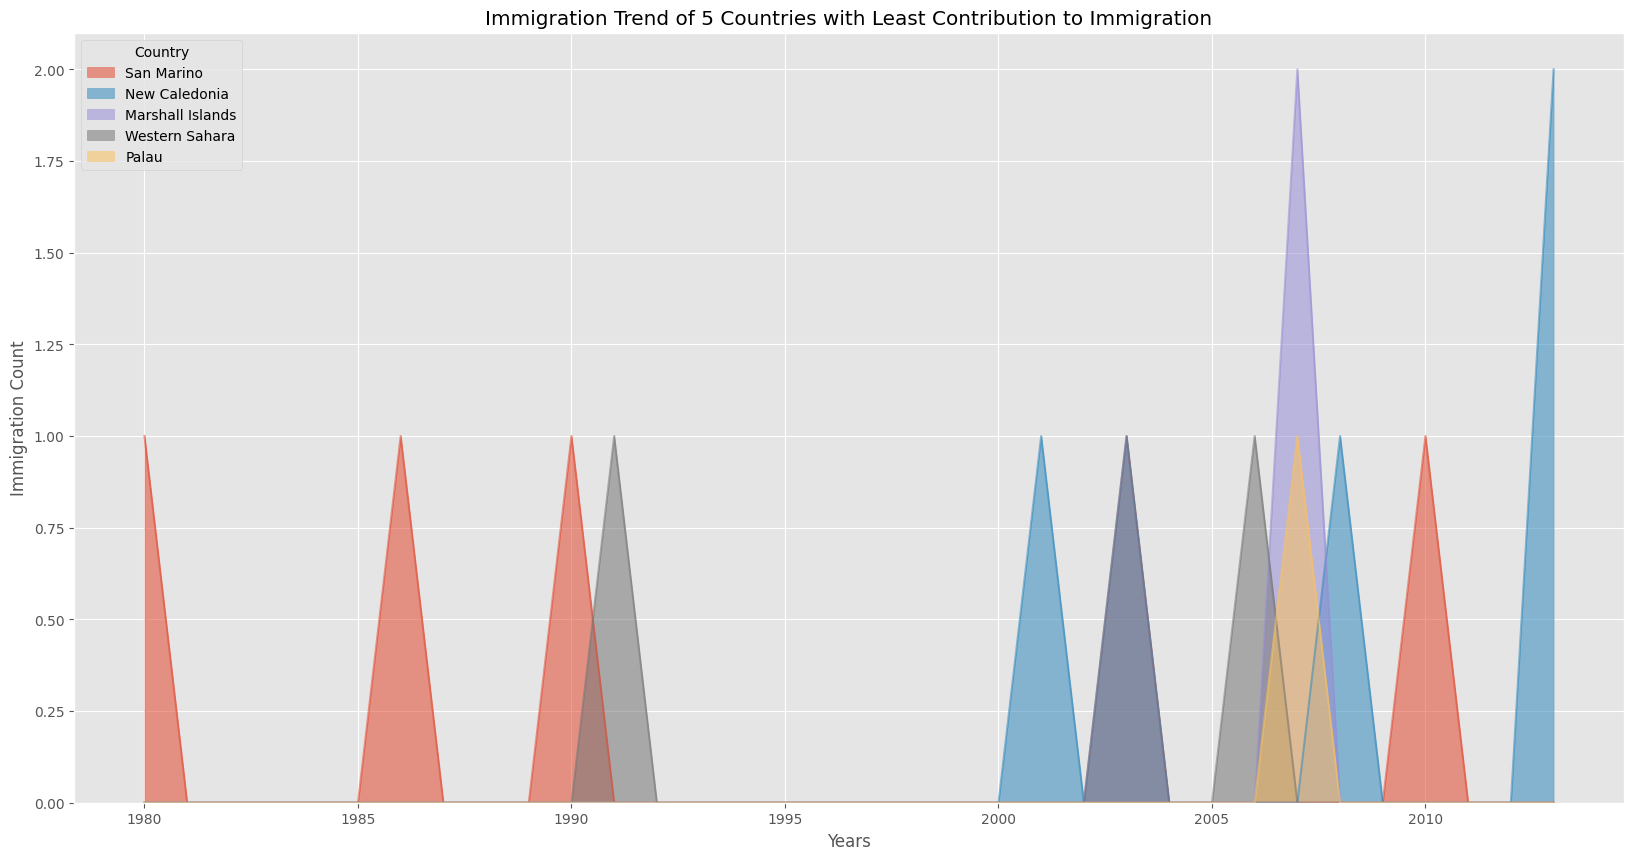

In [21]:
### type your answer here
df_least5=df_can.tail(5)
df_least5=df_least5[years].transpose()

df_least5.index =  df_least5.index.map(int)

ag = df_least5.plot(kind='area',alpha=0.55,stacked=False,figsize=(20,10))
ag.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ag.set_xlabel('Years')
ag.set_ylabel('Immigration Count')

#Histrograms

In [22]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [23]:
# let's quickly view the 1999 data
df_can['1999'].head()

Country
India                                                   18974
China                                                   30069
United Kingdom of Great Britain and Northern Ireland     7045
Philippines                                              9734
Pakistan                                                 9979
Name: 1999, dtype: int64

In [24]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


In [25]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['1999'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[183   5   3   2   0   0   1   0   0   1]
[    0.   3006.9  6013.8  9020.7 12027.6 15034.5 18041.4 21048.3 24055.2
 27062.1 30069. ]


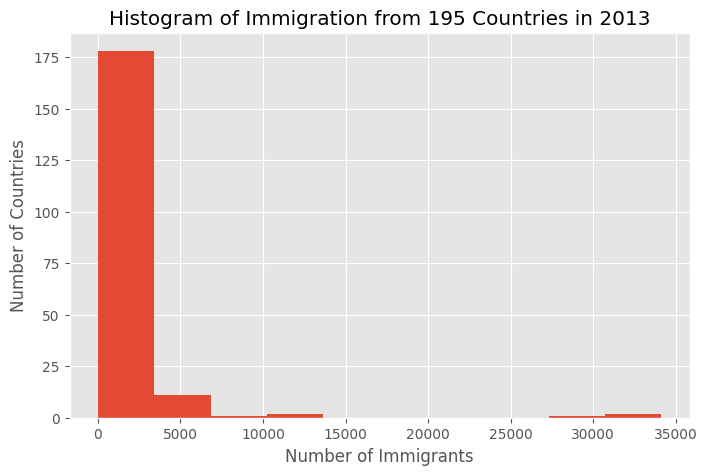

In [26]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

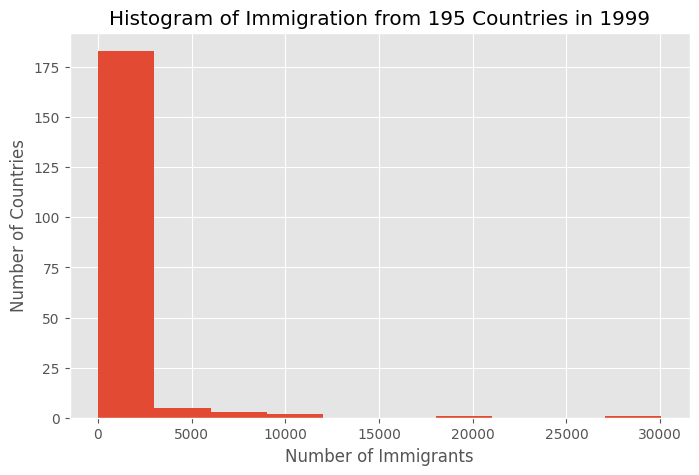

In [27]:
df_can['1999'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 1999') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

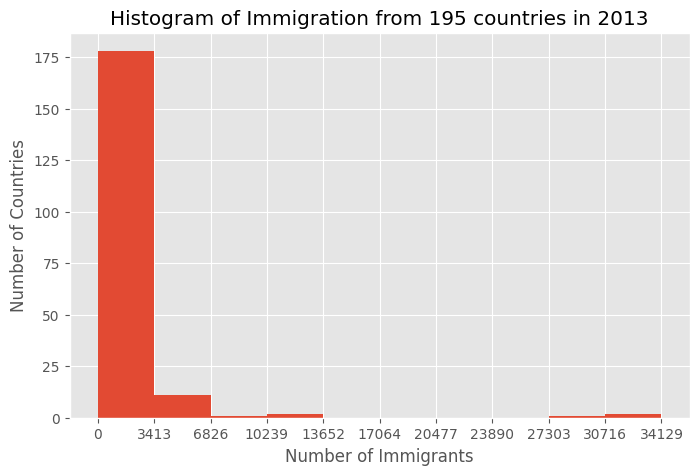

In [28]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [29]:
# let's quickly view the dataset
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [30]:
# let's quickly view the dataset
df_can.loc[['Bangladesh', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,83,84,86,81,98,92,486,503,476,387,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [31]:
# let's quickly view the dataset
df_can.loc[['Bangladesh', 'India', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,83,84,86,81,98,92,486,503,476,387,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [32]:
# let's quickly view the dataset
df_can.loc[['Bangladesh'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,83,84,86,81,98,92,486,503,476,387,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789


In [33]:
# let's quickly view the dataset
df_can.loc[['India'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [36]:
# let's quickly view the dataset
df_can.loc[['Canada'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


<Axes: ylabel='Frequency'>

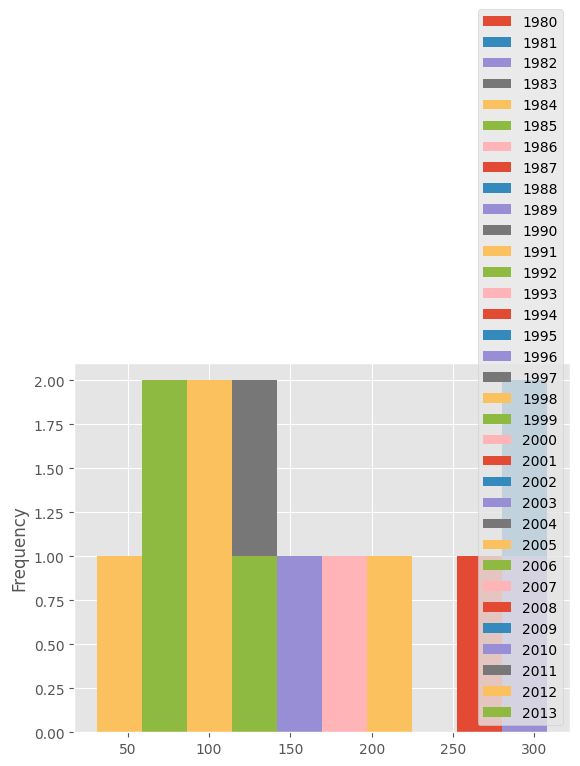

In [37]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()


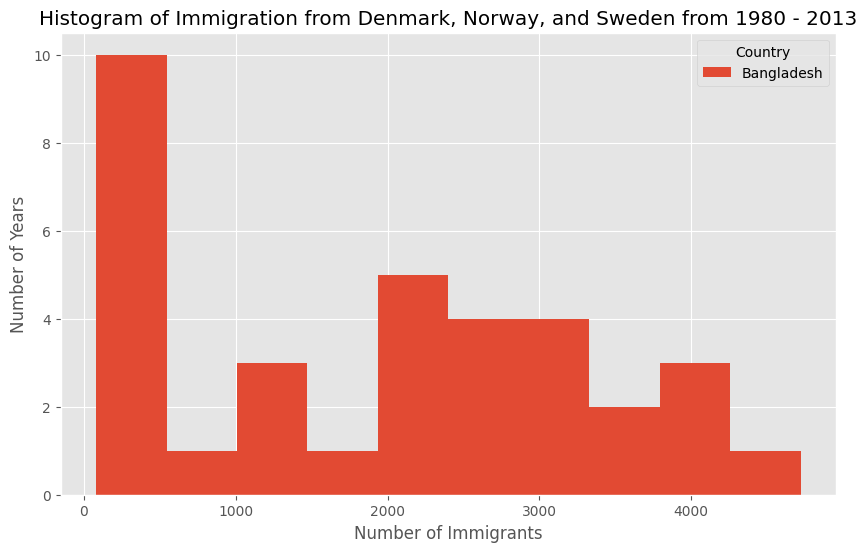

In [45]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

<Axes: ylabel='Frequency'>

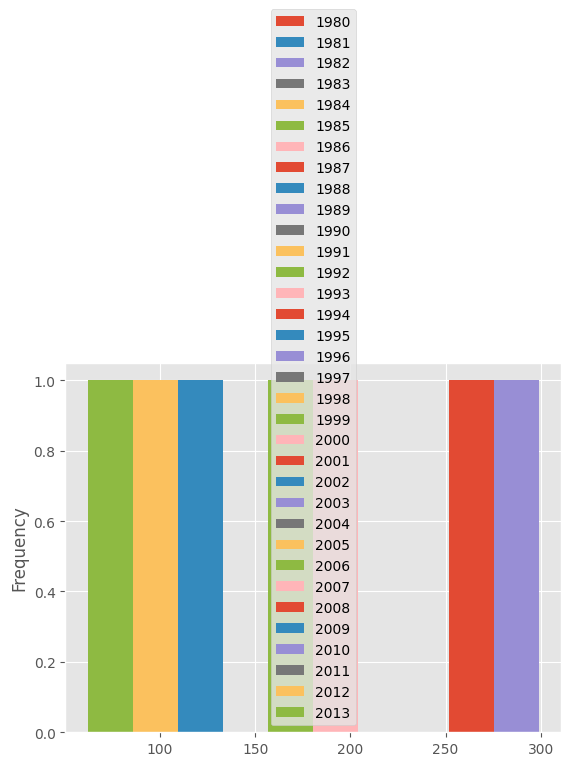

In [38]:
# generate histogram
df_can.loc[['Denmark'], years].plot.hist()

In [39]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


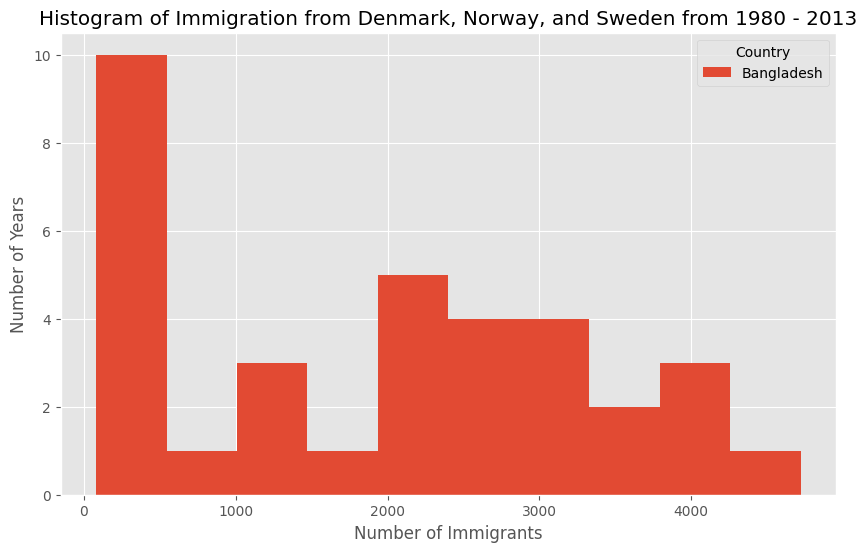

In [44]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [41]:
# transpose dataframe
df_t = df_can.loc[['Bangladesh'], years].transpose()
df_t.head()

Country,Bangladesh
1980,83
1981,84
1982,86
1983,81
1984,98


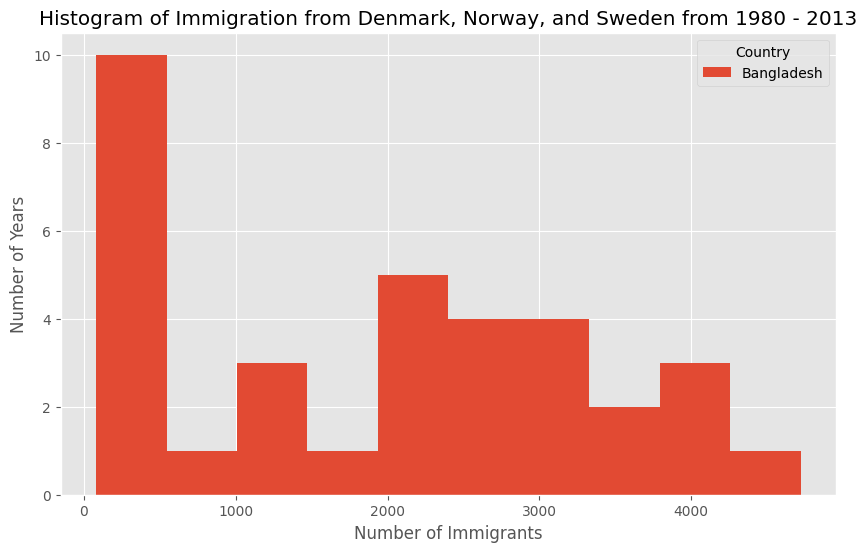

In [43]:
#generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

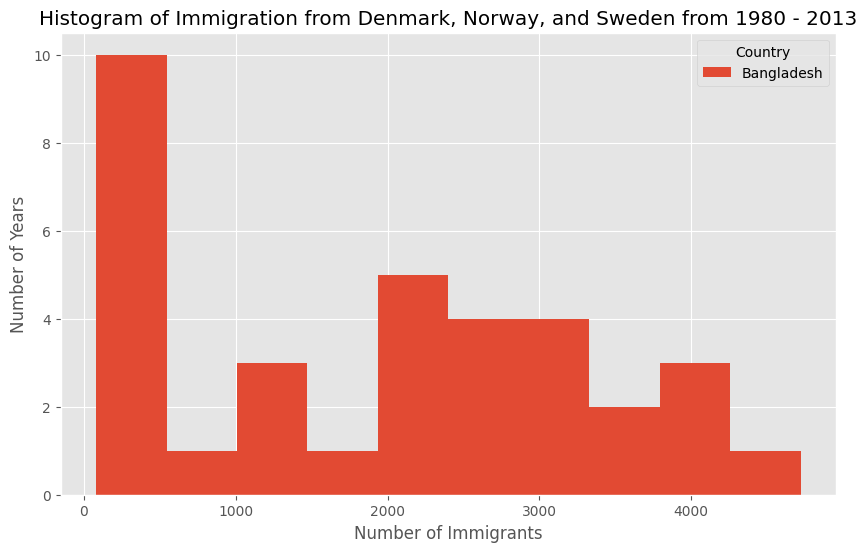

In [46]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

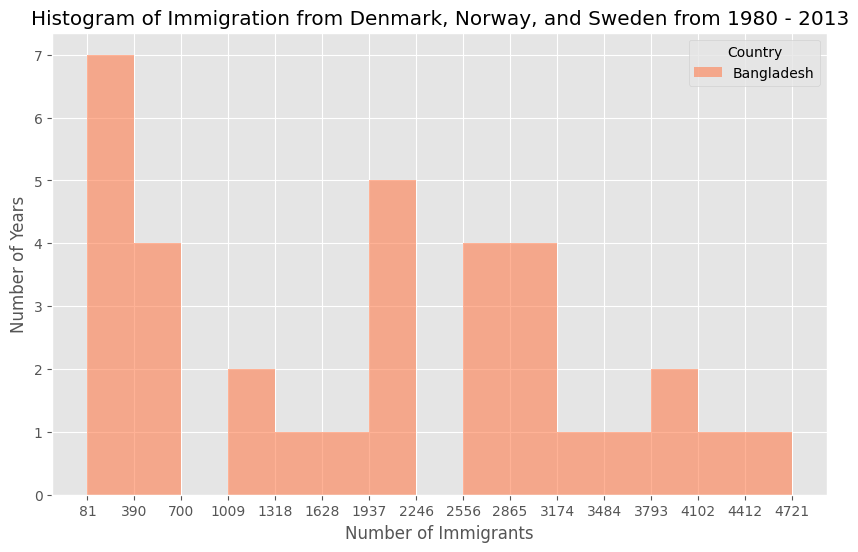

In [47]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

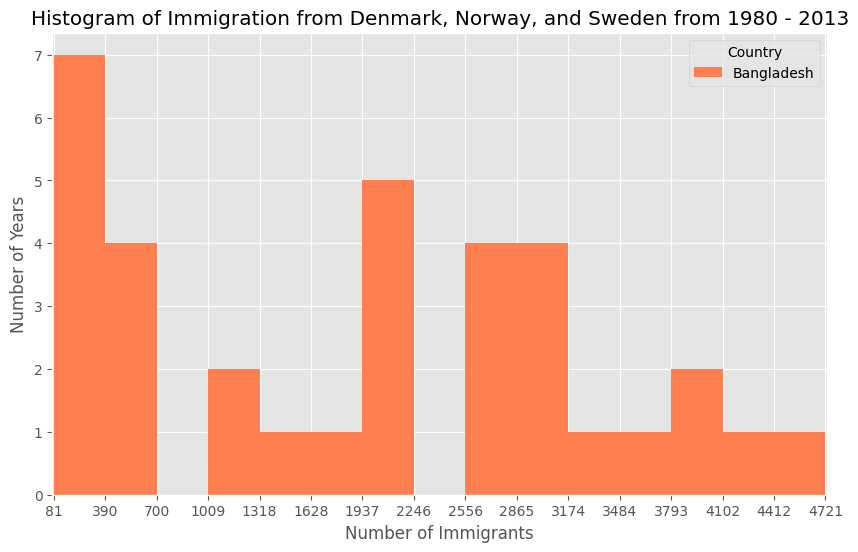

In [48]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

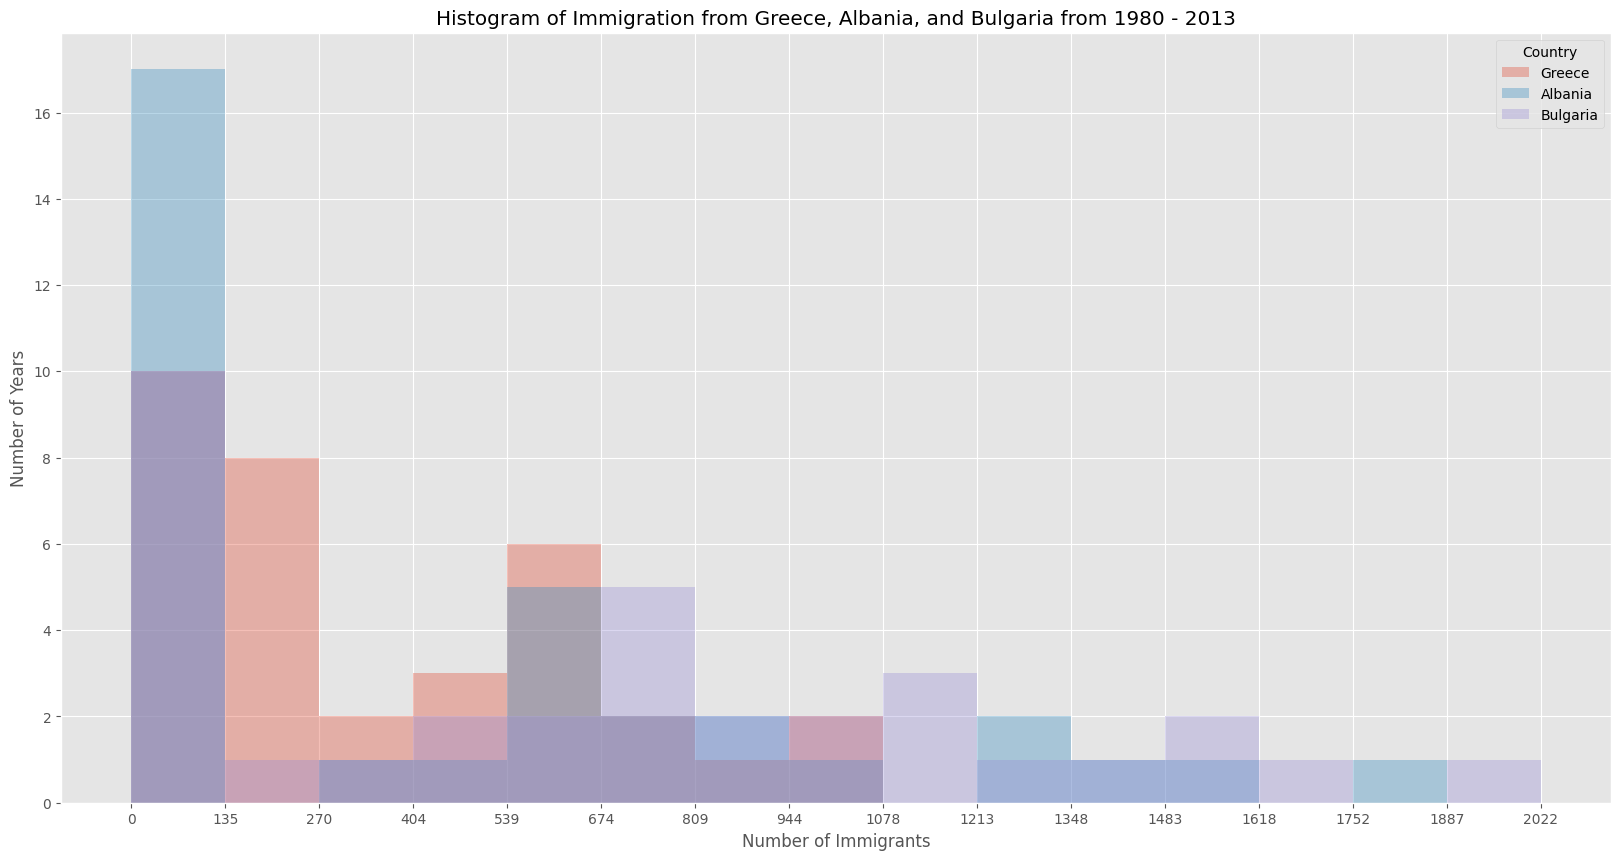

In [49]:
### type your answer here
df_gab = df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()

count, bin_edges = np.histogram(df_gab,15)

df_gab.plot(kind='hist',
           stacked=False,
           figsize=(20, 10),
           bins=15,
           alpha=0.35,
           xticks=bin_edges)

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

#Bar Charts (Dataframe)

In [50]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

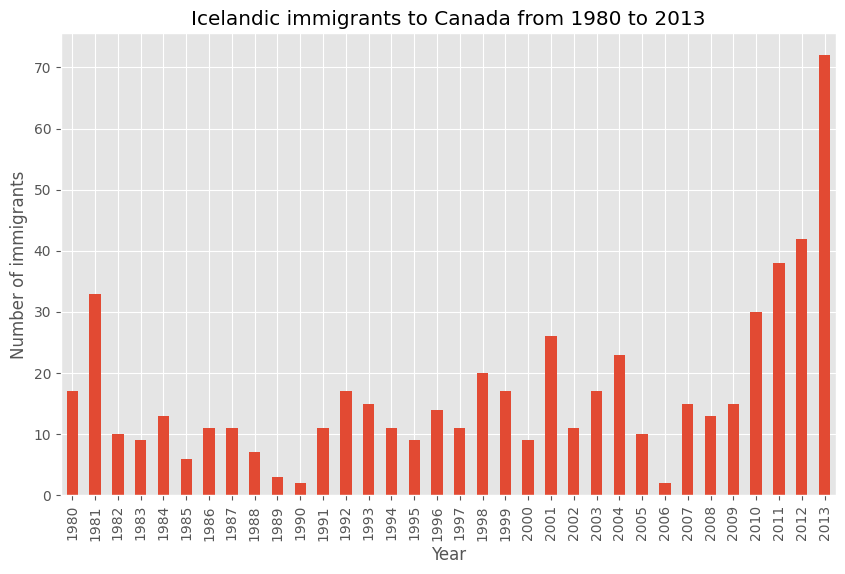

In [51]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

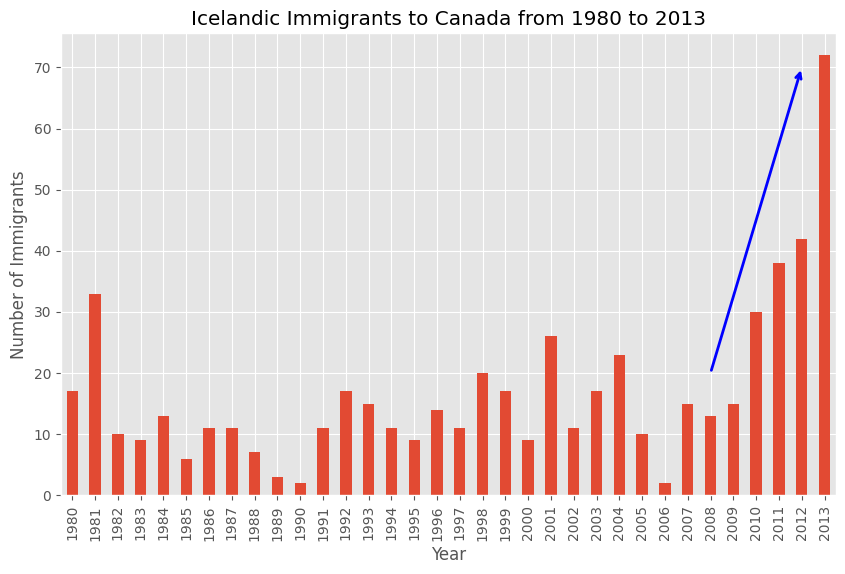

In [52]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

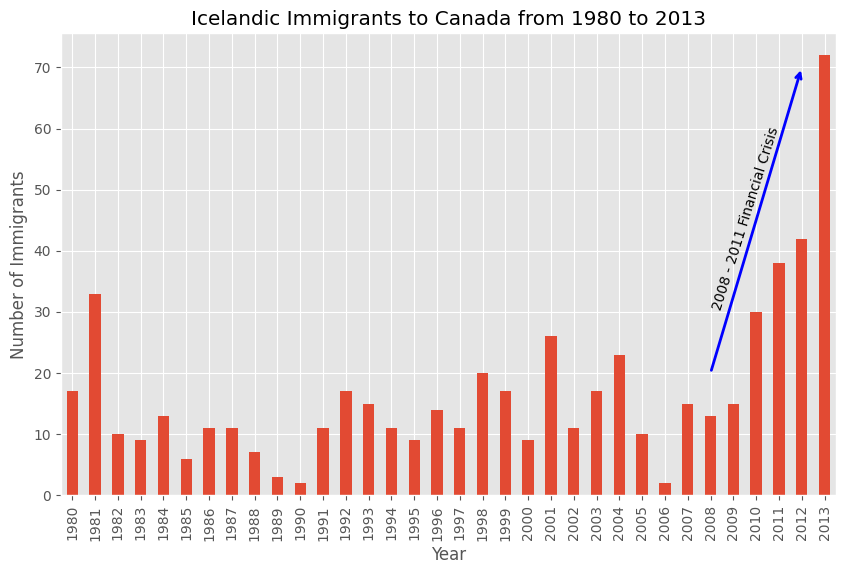

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

#Horizontal Bar Plot

In [54]:
### type your answer here
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

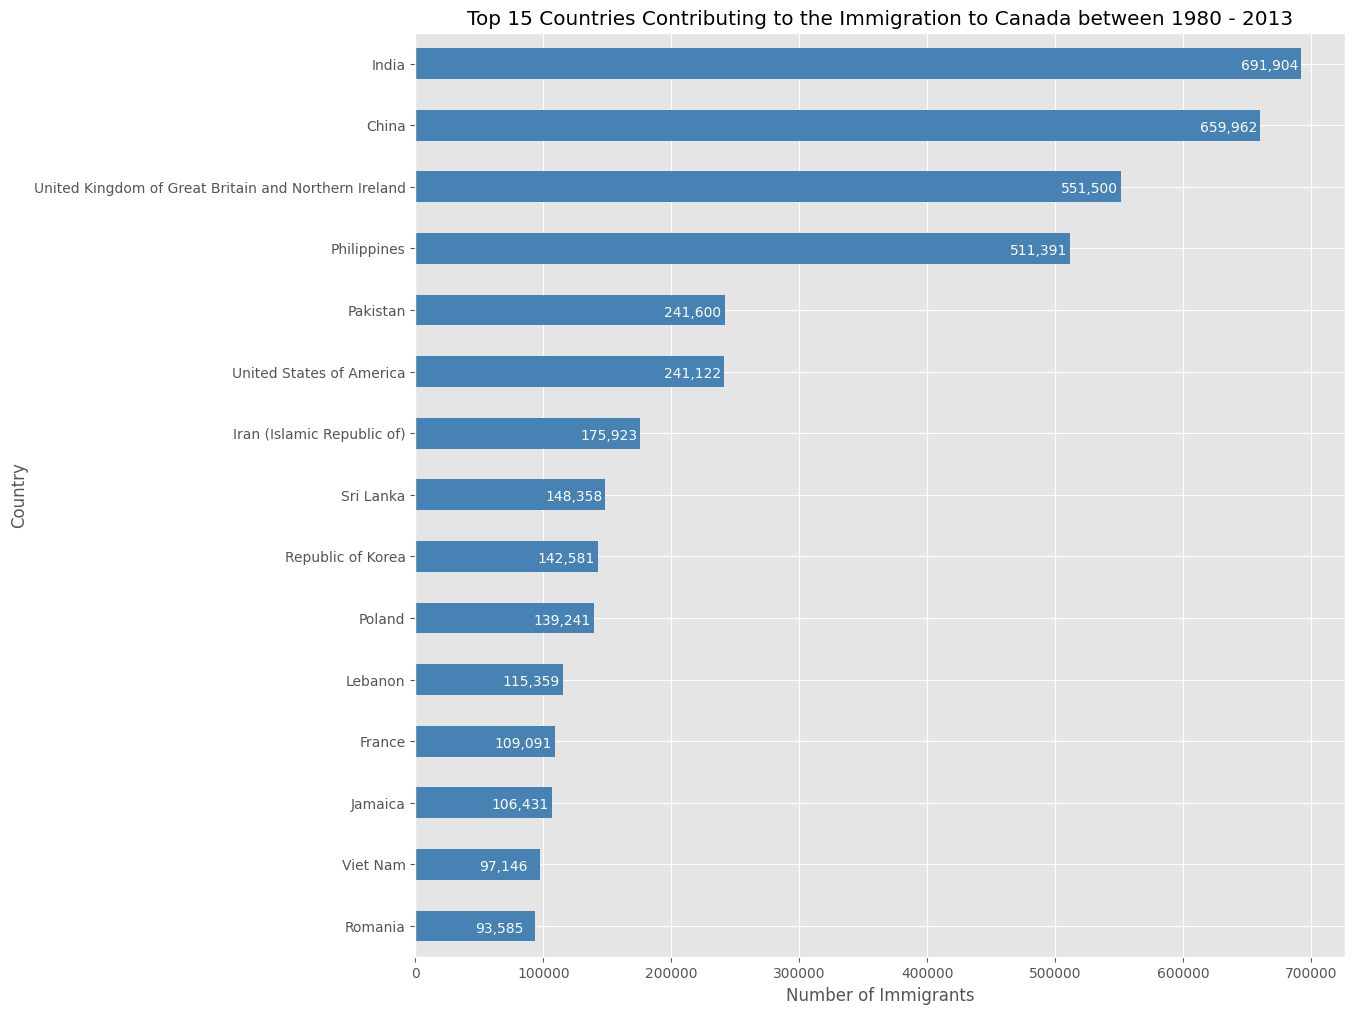

In [55]:
### type your answer here
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')

 # annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

Thank you for completing this lab!